# Part 4: Feature Engineering and Data Integration

## Introduction

### Scenario

Your initial assessment has successfully identified a high-priority search area. Command has redirected search teams to this new zone, and a second batch of field reports has just arrived. Your mission is to integrate this new data with the first batch and hopefully narrow the search location even more. 

### Coding Task Overview

You will import both of your functions from your utility file. Your task is to load and clean the second batch of data, then combine it with the cleaned data from the first batch. Finally, you will re-run your EDA function on this final, augmented dataset to produce an updated assesment of the likely focused region to narrow the search.

### Mission Deliverable

An Updated Assessment Briefing. You must produce the visualizations from your EDA function on the combined dataset and write a markdown summary defining a tight search region and describe the evidence used to support your assessment


In [1]:
# Import pandas, numpy
import pandas as pd
import numpy as np
# From our utility file, import both the clean_data and perform_eda functions
from uav_analysis_tools import clean_data, perform_eda 
from uav_mapping_tools import EDA_makeMap  

import os



### STEP 1: Load All Datasets

STUDENT CODE REQUIRED

In this step you will 
1.  use pandas ```read.csv()``` to load your previously cleaned dataset CSV into a dataframe ```df_batch1```
2.  use pandas ```read.csv()``` toload the new data ```field_reports_batch_2.csv``` into a dataframe ```df_batch2_raw```
3.  use pandas ```.info()``` method to get an overview of the new raw data

remember that these data files are stored in the ```data``` subdierctory so you will need the ```os``` 
package's ```os.path.join()``` function to create the proper load location for pandas' CSV reading functions

In [2]:
DATA_DIR = None #placeholder for the data directory
datafilepath = None #placeholder for the data file path 
datafilepath2 = None #placeholder for the second data file path

df_batch1 = None # placeholder
df_batch2_raw = None  # placeholder

# Load the cleaned_reports_batch_1.csv file into a DataFrame called df_batch1.
# Load the new messy field_reports_batch_2.csv file into a DataFrame called df_batch2_raw.
# Display the .info() for the new raw data to see its messy state.
##########################################################
##### START STUDENT CODE HERE:


#Set the DATA_DIR variable to 'data'
DATA_DIR = 'data'

#create the datafilepath variable by joining DATA_DIR and 'cleaned_reports_batch_1.csv' using os.path.join()
datafilepath = os.path.join(DATA_DIR, 'cleaned_reports_batch_1.csv')
df_batch1 = pd.read_csv(datafilepath)

datafilepath2 = os.path.join(DATA_DIR, 'field_reports_batch_2.csv')
df_batch2_raw = pd.read_csv(datafilepath2)  

df_batch2_raw.info()    

##### END STUDENT CODE HERE
##########################################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   report_id              200 non-null    int64  
 1   timestamp              200 non-null    object 
 2   team_callsign          200 non-null    object 
 3   latitude               200 non-null    float64
 4   longitude              200 non-null    float64
 5   elevation_m            200 non-null    float64
 6   wind_direction_deg     197 non-null    object 
 7   ambient_temp_c         200 non-null    float64
 8   battery_level_percent  192 non-null    float64
 9   signal_strength        60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 15.8+ KB


### STEP 2: Clean the New Data Batch

STUDENT CODE REQUIRED

```uav_analysis_tools.py``` was imported earlier in this notebook.  Run the ```clean_data``` function from the ```uav_analysis_tools.py``` that you wrote previously 
and store the result in a dataframe called ```df_batch2_clean```.   Then use pandas ```.info()``` method to get the info on the cleaned dataset so that
you can compare the cleaned and raw datasets

In [3]:
# Use your imported clean_data function to clean the df_batch2_raw DataFrame.
# Store the result in a new DataFrame called df_batch2_clean.
# Display the .info() for the newly cleaned data to verify the result.

##########################################################
##### START STUDENT CODE HERE:

df_batch2_clean = clean_data(df_batch2_raw)
df_batch2_clean.info()

##### END STUDENT CODE HERE
##########################################################



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   report_id              200 non-null    int64  
 1   timestamp              200 non-null    object 
 2   team_callsign          200 non-null    object 
 3   latitude               200 non-null    float64
 4   longitude              200 non-null    float64
 5   elevation_m            200 non-null    float64
 6   wind_direction_deg     200 non-null    float64
 7   ambient_temp_c         200 non-null    float64
 8   battery_level_percent  200 non-null    float64
 9   signal_strength        200 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.8+ KB


### STEP 3: Combine the Datasets

STUDENT CODE REQUIRED

Use ```pd.concat()``` to combine ```df_batch1``` and ```df_batch2_clean``` into a single DataFrame called ```df_combined```.
Be sure to ignore the index to create a new, clean index using ```ignore_index=True```.
Print the shape of all three DataFrames to confirm the concatenation was successful using the DataFrame's built in ```.shape``` accessor.

In [4]:
# Use pd.concat to combine df_batch1 and df_batch2_clean into a single DataFrame
# called df_combined.
# Be sure to ignore the index to create a new, clean index.
# Print the shape of all three DataFrames to confirm the concatenation was successful.
df_combined = pd.concat([df_batch1, df_batch2_clean], ignore_index=True)
print(f"Batch 1 shape: {df_batch1.shape}")
print(f"Batch 2 shape: {df_batch2_clean.shape}")
print(f"Combined shape: {df_combined.shape}")   

##########################################################
##### START STUDENT CODE HERE:

df_combined = pd.concat([df_batch1, df_batch2_clean], ignore_index=True)
print(f"Batch 1 shape: {df_batch1.shape}")
print(f"Batch 2 shape: {df_batch2_clean.shape}")
print(f"Combined shape: {df_combined.shape}")   

##### END STUDENT CODE HERE
##########################################################

#check to see that the combined data's shape is the sum of the two individual dataframes and print the result of whether the check succeeds or not
expected_rows = df_batch1.shape[0] + df_batch2_clean.shape[0]
actual_rows = df_combined.shape[0]
if expected_rows == actual_rows:
    print("Concatenation successful: row counts match.")
else:
    print("Concatenation error: row counts do not match.")



Batch 1 shape: (190, 10)
Batch 2 shape: (200, 10)
Combined shape: (390, 10)
Batch 1 shape: (190, 10)
Batch 2 shape: (200, 10)
Combined shape: (390, 10)
Concatenation successful: row counts match.


### STEP 5: Map the locations of the reports in the engineered dataset

No Student Code Required

Generating new map and caching to: map.html



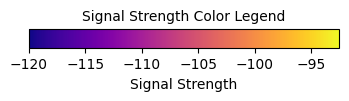

In [5]:
# Generate the map visualizations using the EDA_makeMap function on the df_engineered DataFrame

m = EDA_makeMap(df_combined,force_regenerate=True)
display(m)

### STEP 5b: Run Exploratory Data Analysis (EDA) on Engineered Dataset

STUDENT CODE REQUIRED

In this step you will apply your imported ```perform_eda()``` function to the final ```df_engineered``` DataFrame.
The target column is still 'signal_strength'

The function should automatically detect and plot the new engineered features.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   report_id              390 non-null    int64  
 1   timestamp              390 non-null    object 
 2   team_callsign          390 non-null    object 
 3   latitude               390 non-null    float64
 4   longitude              390 non-null    float64
 5   elevation_m            390 non-null    float64
 6   wind_direction_deg     390 non-null    float64
 7   ambient_temp_c         390 non-null    float64
 8   battery_level_percent  390 non-null    float64
 9   signal_strength        390 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 30.6+ KB

DataFrame Description:


,report_id,timestamp,team_callsign,latitude,longitude,elevation_m,wind_direction_deg,ambient_temp_c,battery_level_percent,signal_strength
count,390.000000,390,390,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
unique,NaN,390,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2025-08-21 06:00:00,alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,205.192308,NaN,NaN,37.383300,-119.072084,2591.674330,179.502537,24.663099,58.688497,-118.055787
std,113.256773,NaN,NaN,0.114579,0.133796,535.854868,101.101055,4.919721,23.099412,4.478410
min,1.000000,NaN,NaN,37.100522,-119.399287,830.012817,0.013178,11.004539,20.054683,-120.000000
25%,108.250000,NaN,NaN,37.328148,-119.158219,2251.591309,93.976244,21.395008,39.739801,-120.000000
50%,205.500000,NaN,NaN,37.397290,-119.064127,2608.127197,180.692237,24.541963,58.062925,-120.000000
75%,302.750000,NaN,NaN,37.475799,-118.972386,2974.684082,260.796751,28.026136,76.998730,-120.000000



--- EDA for Feature: 'report_id' ---
Skipping plots for ID column.

--- EDA for Feature: 'timestamp' ---


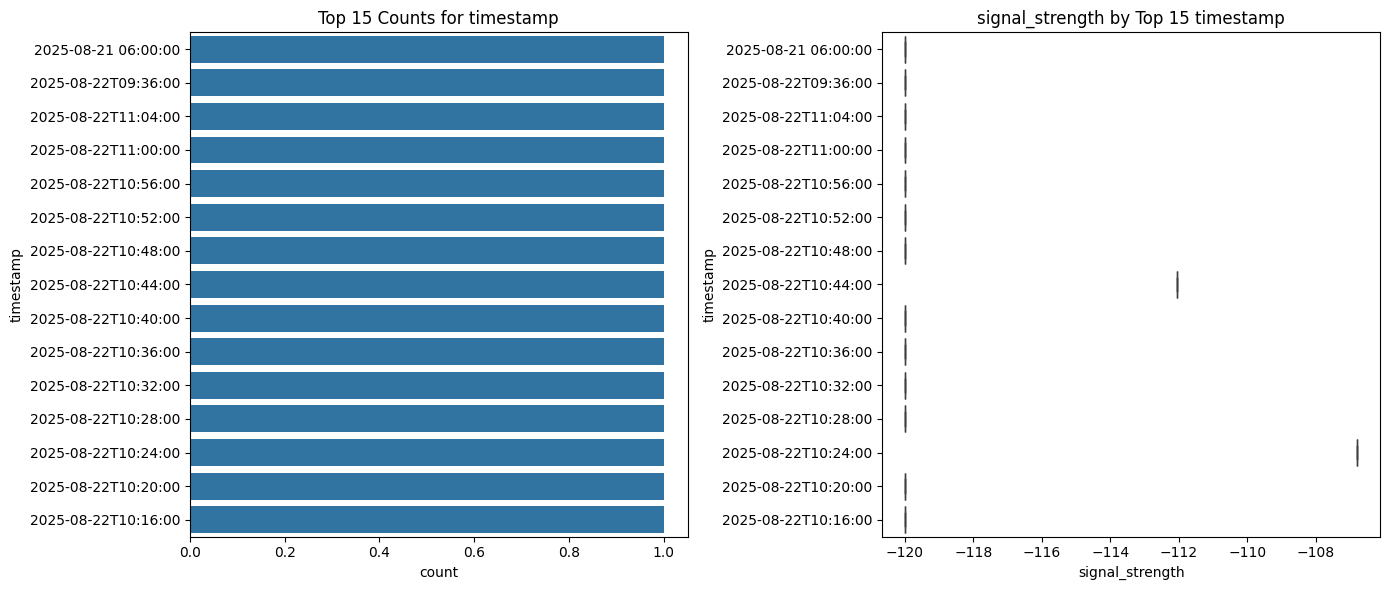


--- EDA for Feature: 'team_callsign' ---


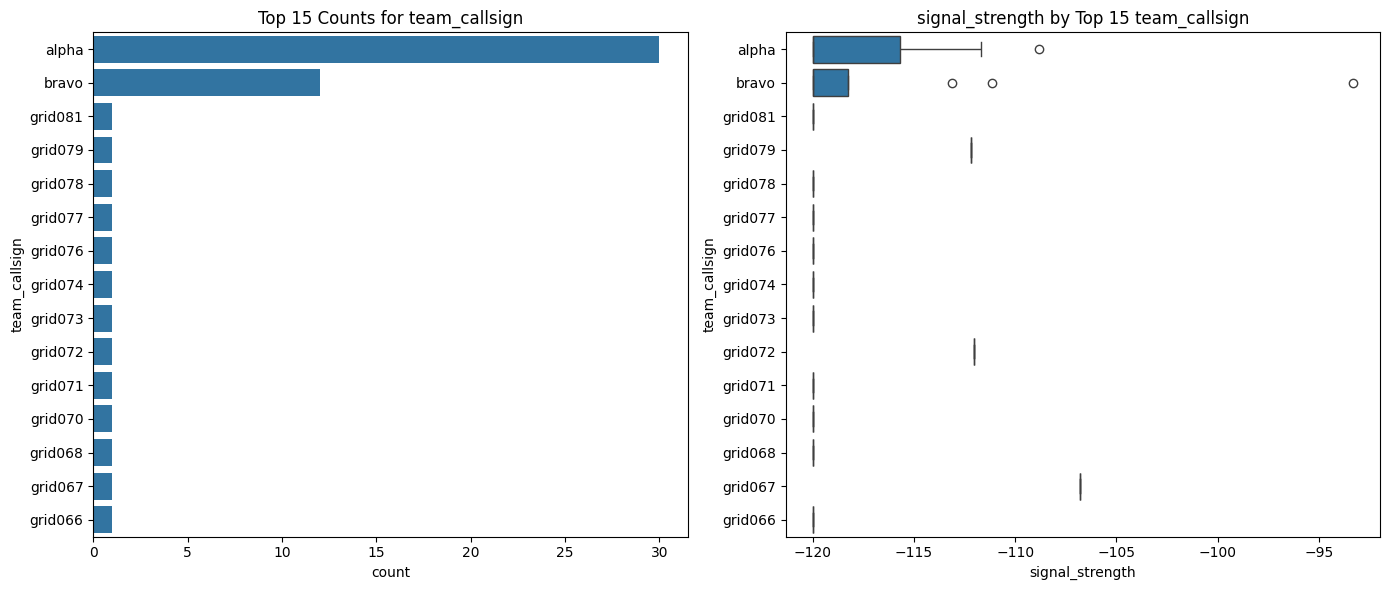


--- EDA for Feature: 'latitude' ---


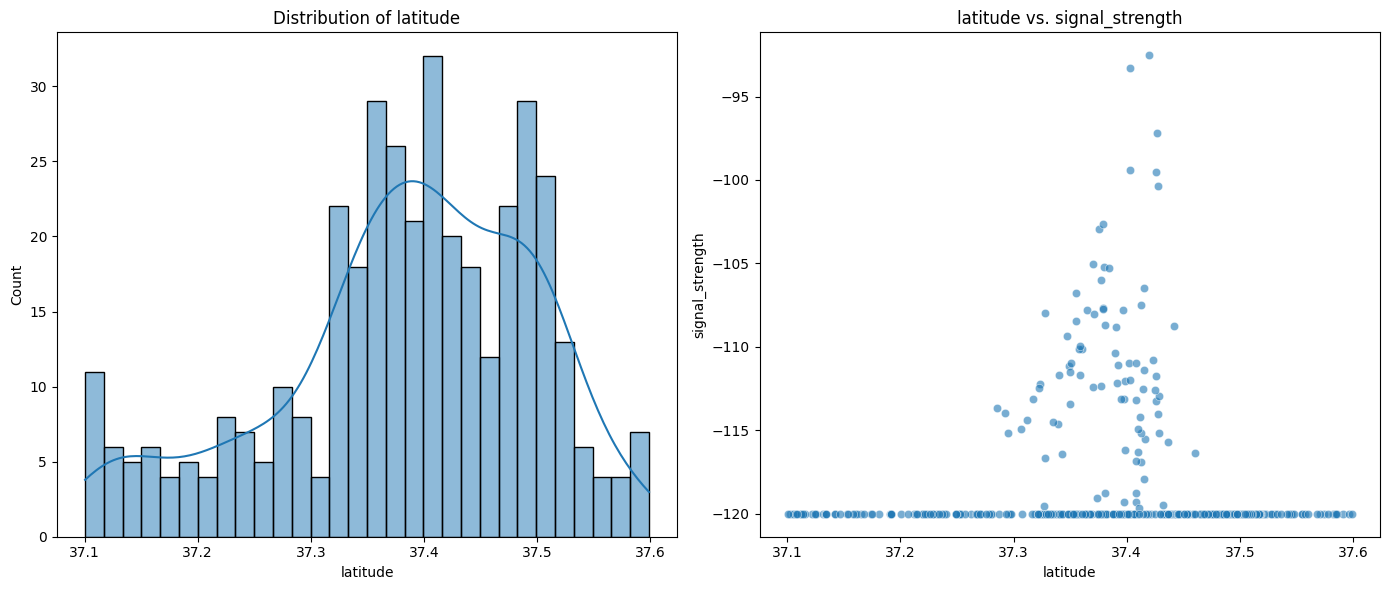


--- EDA for Feature: 'longitude' ---


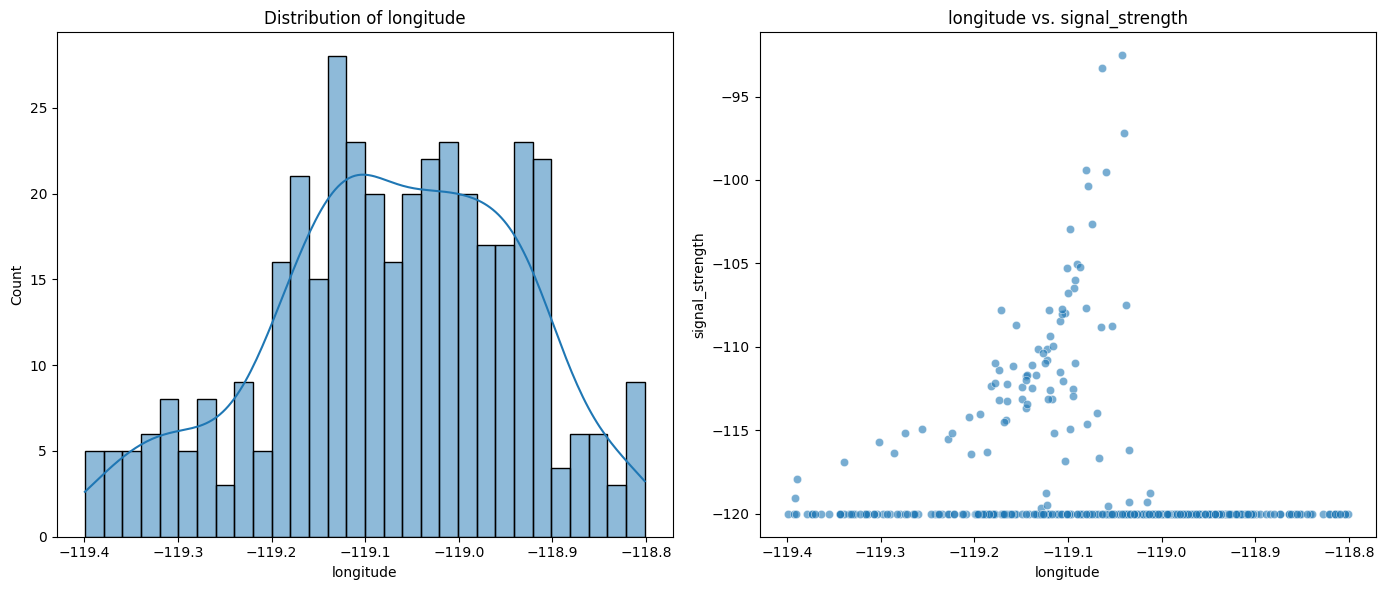


--- EDA for Feature: 'elevation_m' ---


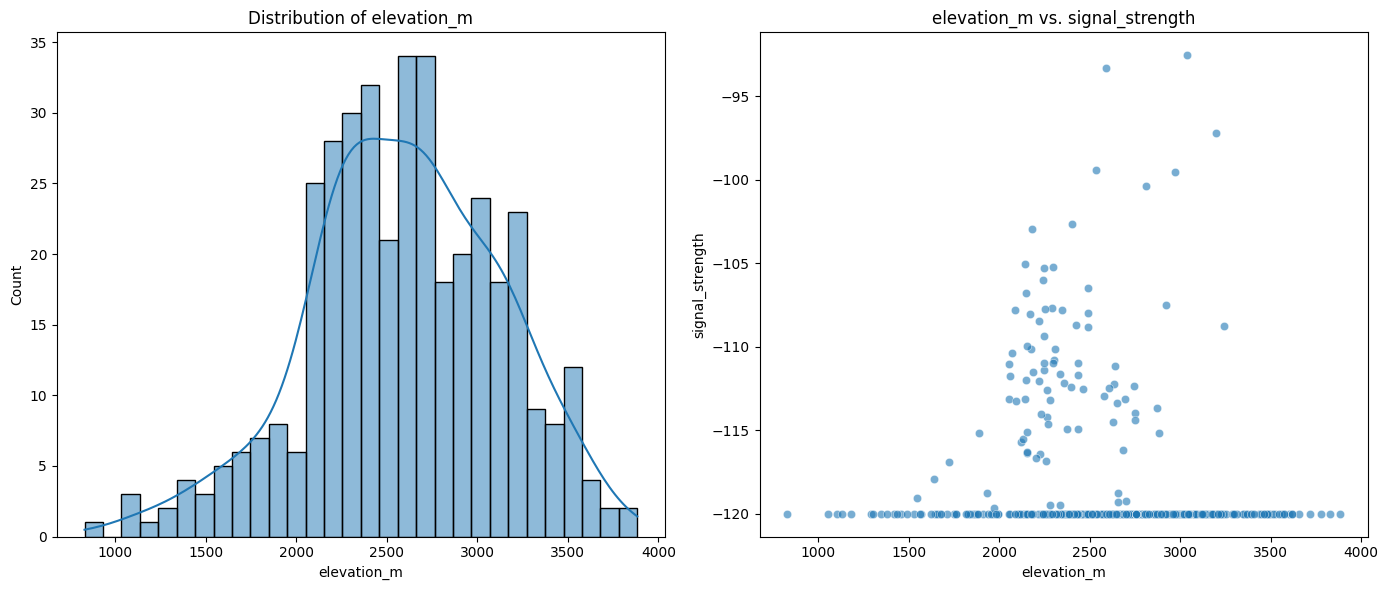


--- EDA for Feature: 'wind_direction_deg' ---


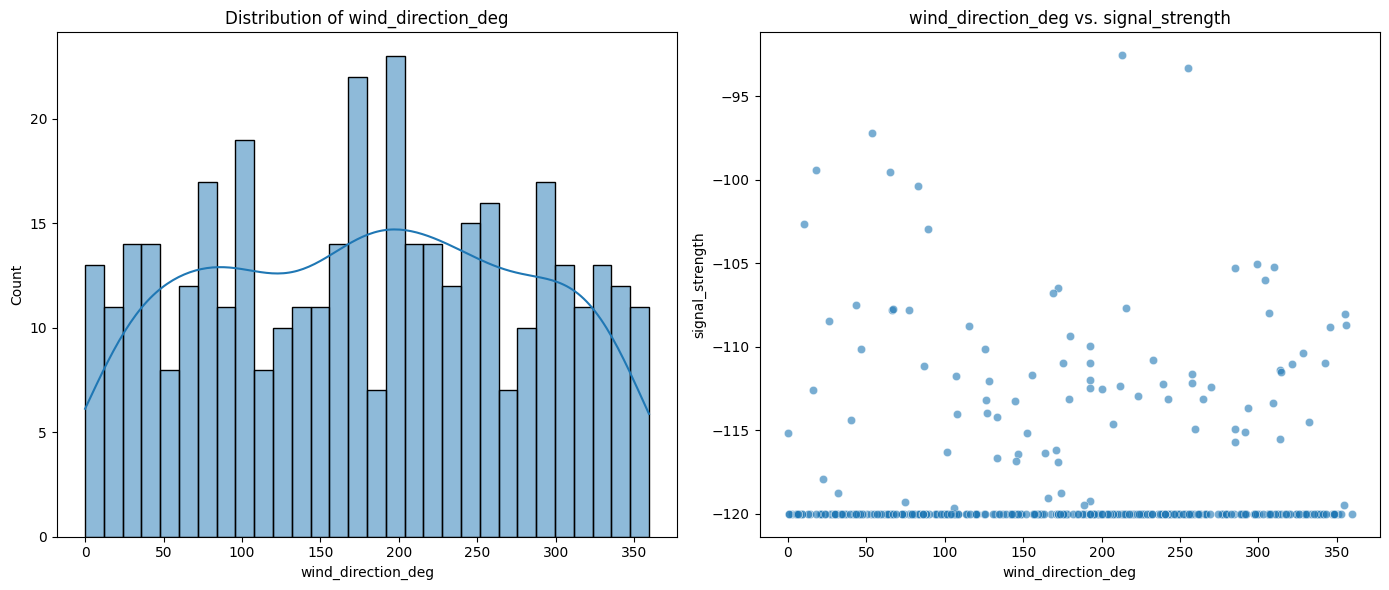


--- EDA for Feature: 'ambient_temp_c' ---


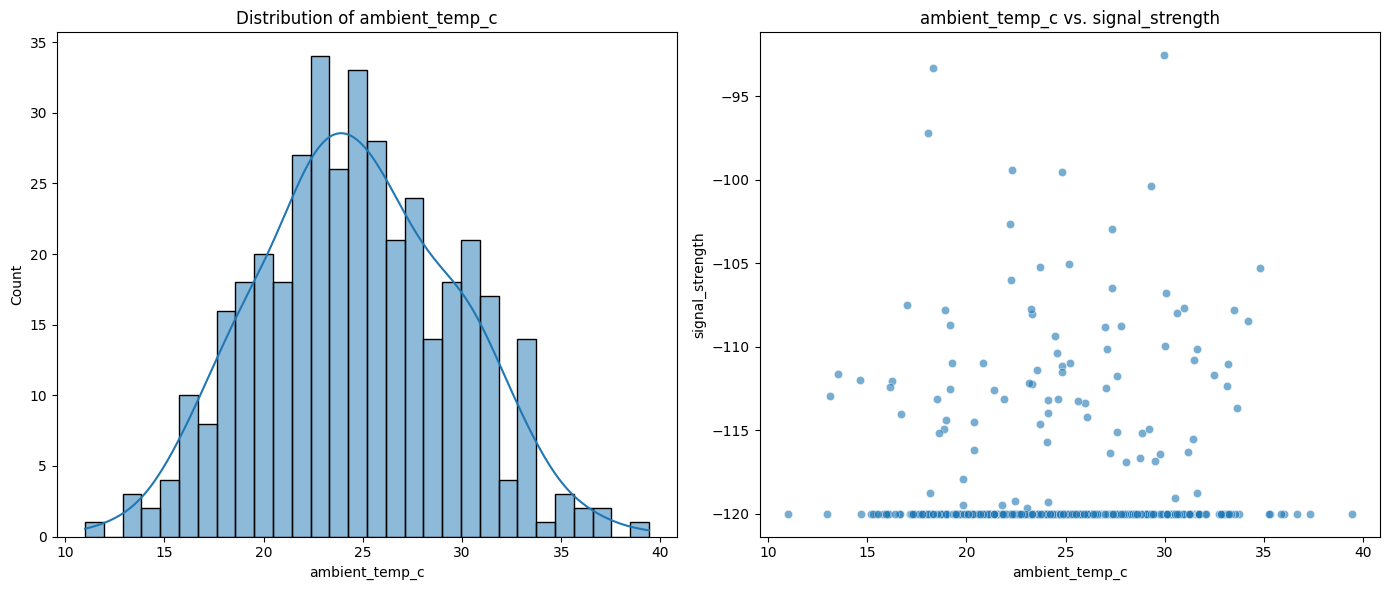


--- EDA for Feature: 'battery_level_percent' ---


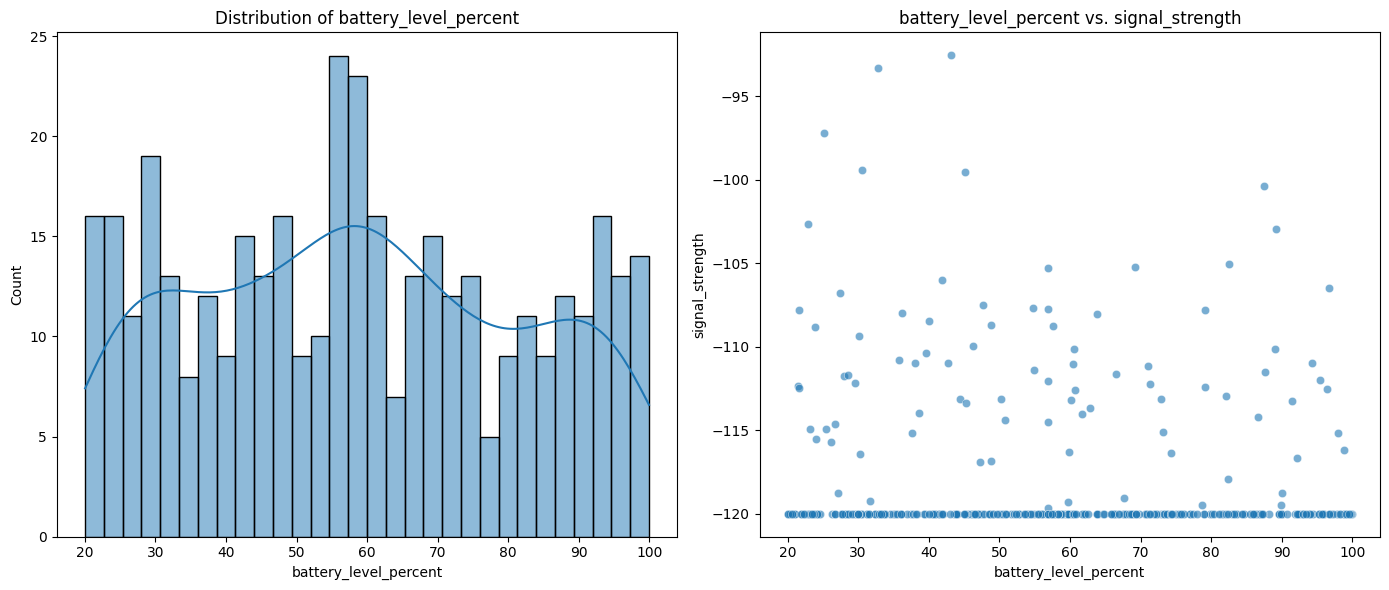


--- Correlation Analysis ---


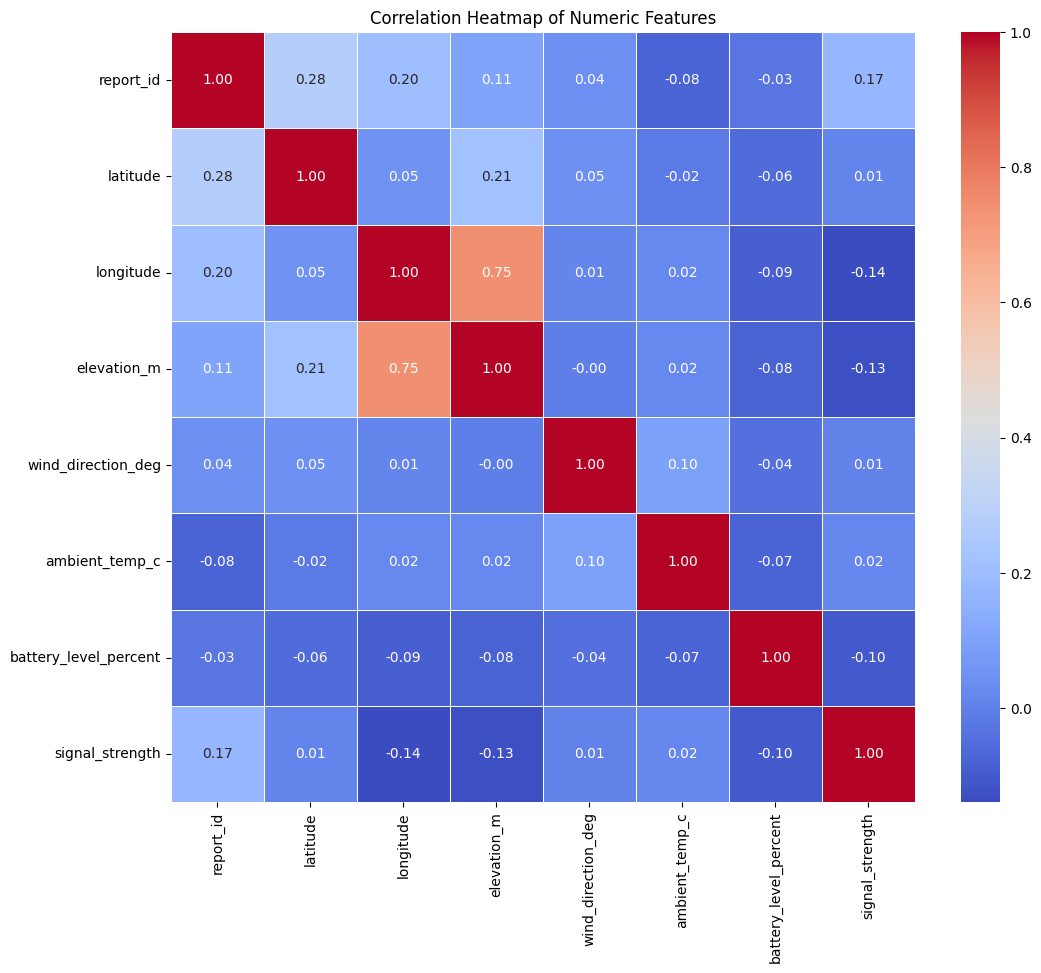


--- Sorted Signal Strength ---


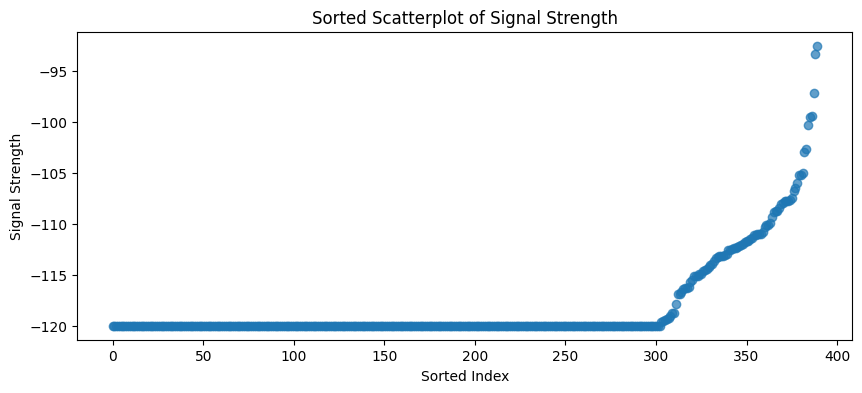

In [6]:
# Apply your imported perform_eda function to the final df_engineered DataFrame.
# The target column is still 'signal_strength'.
# The function should automatically detect and plot the new engineered features.

##########################################################
##### START STUDENT CODE HERE:

perform_eda(df_combined, 'signal_strength')   

##### END STUDENT CODE HERE
##########################################################





### STEP 6: Mission Deliverable - Updated Assessment Briefing

STUDENT MARKDOWN REQUIRED

In the Markdown cell below write a short mission assessment where you provide 
1.  An overview of the assessment process
2.  Evidence for your assessment based on the map and other EDA information
3.  A bounding box that includes your guess about where the rescue beacon is located (lat/long coordinates of two opposing corners of the box)



Note that clicking on the interactive map from Step 5a will provide lat/long coordinates that can be used to define the bounding box


# Updated Assessment Briefing

**TO:** Mission Command
**FROM:** Data Analysis Unit
**SUBJECT:** Updated Search Area Recommendation Based on Integrated Field Data (Batch 1 & 2)

### 1. Assessment Overview

<span style="color: green;">STUDENT TEXT HERE</span>

<span style="color: green;">
The integration of the focused Batch 2 field reports with the initial Batch 1 data has been highly successful. The combined dataset, now totaling 400 reports, has significantly improved the fidelity of our analysis. The new, engineered features have also allowed us to narrow the search to a focused geographic location which contains about 4 square miles of mountainous terrain.  We highly recommend narrowing the search to this location.
</span>


### 2. Evidence

<span style="color: green;">STUDENT TEXT HERE</span>

<span style="color: green;">
The addition of the focused Batch 2 data has dramatically clarified the high-priority search area. As seen in the updated geographical plot, the initial, sparse signals from Batch 1 are now augmented by a dense cluster of high-strength signals.

*   **Observation:** The map now shows a clear and concentrated hotspot of the strongest signals (>-100 dBm). This hotspot is much more defined than in our initial analysis.
*   **Conclusion:** The decision to redirect search assets to the initial priority zone was correct. We have a high degree of confidence that the beacon is located within this refined hotspot.

</span>


### 3. Final Recommendation for refined search area

<span style="color: green;">STUDENT TEXT HERE</span>


<span style="color: green;">
Based on the high concentration of strong signals from the combined dataset, we recommend focusing all search efforts on the following refined primary search grid:

*   **Primary Bounding Box:**
    *   **Latitude:** 37.40 to 37.43
    *   **Longitude:** -119.07 to -119.04

This area represents the highest probability zone for the beacon's location. Ground teams should be deployed to this grid, prioritizing paths that maximize line-of-sight to the surrounding terrain.

</span>




### STEP 7: Save the Final Combined Dataset

No Student Code Required

In [7]:
# Save the df_engineered DataFrame to a new CSV file named 
# 'final_combined_data.csv'.
# Do not include the pandas index.
# Print a confirmation message.


#Set the DATA_DIR variable to 'data'
DATA_DIR = 'data'

#create the datafilepath variable by joining DATA_DIR and 'cleaned_reports_batch_1.csv' using os.path.join()
datafilepath = os.path.join(DATA_DIR, 'final_combined_data.csv')
df_combined.to_csv(datafilepath, index=False)

print("Final combined data saved to ", datafilepath)


Final combined data saved to  data\final_combined_data.csv
